In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import time 

In [2]:
pokemon = pd.read_csv("/home/user/Desktop/Data_analysis_projects/Pokemon/data.csv", index_col = 0)
stats = pd.read_csv("/home/user/Desktop/Data_analysis_projects/Pokemon/stats.csv", index_col = 0)

In [3]:
pokemon

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen
1,#0001,Bulbasaur,Grass / Poison,Overgrow,Chlorophyll,"87.5% male, 12.5% female",20cycles,Monster / Grass,64.0,0.7,6.9,Medium Slow,Green,70.0,Seed Pokémon,1
2,#0002,Ivysaur,Grass / Poison,Overgrow,Chlorophyll,"87.5% male, 12.5% female",20cycles,Monster / Grass,142.0,1.0,13.0,Medium Slow,Green,70.0,Seed Pokémon,1
3,#0003,Venusaur,Grass / Poison,Overgrow / Chlorophyll,Thick Fat,"87.5% male, 12.5% female",20cycles,Monster / Grass,236.0,2.0,100.0,Medium Slow,Green,70.0,Seed Pokémon,1
4,#0004,Charmander,Fire,Blaze,Solar Power,"87.5% male, 12.5% female",20cycles,Monster / Dragon,62.0,0.6,8.5,Medium Slow,Red,70.0,Lizard Pokémon,1
5,#0005,Charmeleon,Fire,Blaze,Solar Power,"87.5% male, 12.5% female",20cycles,Monster / Dragon,142.0,1.1,19.0,Medium Slow,Red,70.0,Flame Pokémon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,#1021,Raging Bolt,Electric / Dragon,Protosynthesis,None,Gender unknown,50cycles,No Eggs Discovered,295.0,5.2,480.0,Slow,Yellow,0.0,Paradox Pokémon,9
1022,#1022,Iron Boulder,Rock / Psychic,Quark Drive,None,Gender unknown,50cycles,No Eggs Discovered,295.0,1.5,162.5,Slow,Gray,0.0,Paradox Pokémon,9
1023,#1023,Iron Crown,Steel / Psychic,Quark Drive,None,Gender unknown,50cycles,No Eggs Discovered,295.0,1.6,156.0,Slow,Blue,0.0,Paradox Pokémon,9
1024,#1024,Terapagos,Normal,Tera Shift / Tera Shell,Teraform Zero,"50% male, 50% female",5cycles,No Eggs Discovered,90.0,0.2,6.5,Slow,Blue,50.0,Tera Pokémon,9


In [4]:
stats

,name,hp,attack,defense,special_attack,special_defense,speed,total
1,Bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0,318.0
2,Ivysaur,60.0,62.0,63.0,80.0,80.0,60.0,405.0
3,Venusaur,80.0,82.0,83.0,100.0,100.0,80.0,525.0
4,Charmander,39.0,52.0,43.0,60.0,50.0,65.0,309.0
5,Charmeleon,58.0,64.0,58.0,80.0,65.0,80.0,405.0
...,...,...,...,...,...,...,...,...
1021,Raging Bolt,125.0,73.0,91.0,137.0,89.0,75.0,590.0
1022,Iron Boulder,90.0,120.0,80.0,68.0,108.0,124.0,590.0
1023,Iron Crown,90.0,72.0,100.0,122.0,108.0,98.0,590.0
1024,Terapagos,90.0,65.0,85.0,65.0,85.0,60.0,450.0


In [41]:
stats.describe()

,hp,attack,defense,special_attack,special_defense,speed,total
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,70.072195,77.380488,72.395122,69.959024,70.088780,67.127805,427.023415
std,26.665218,29.723557,29.364210,29.637133,26.668189,28.654567,112.779018
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,325.000000
50%,67.000000,75.000000,70.000000,65.000000,65.000000,65.000000,450.000000
75%,85.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000
max,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000


In [43]:
stats.corr()

,hp,attack,defense,special_attack,special_defense,speed,total
hp,1.000000,0.480018,0.299119,0.356717,0.365108,0.179567,0.666531
attack,0.480018,1.000000,0.466646,0.286626,0.226016,0.353644,0.717170
defense,0.299119,0.466646,1.000000,0.208710,0.501515,0.007538,0.629432
special_attack,0.356717,0.286626,0.208710,1.000000,0.492095,0.423616,0.701008
special_defense,0.365108,0.226016,0.501515,0.492095,1.000000,0.213162,0.696413
speed,0.179567,0.353644,0.007538,0.423616,0.213162,1.000000,0.553428
total,0.666531,0.717170,0.629432,0.701008,0.696413,0.553428,1.000000


In [47]:
pokemon["height"].corr(pokemon["weight"])

0.6325037512626636

In [44]:
pokemon["weight"].corr()

,Base_Experience_Yield,height,weight,base_friendship,gen
Base_Experience_Yield,1.000000,0.476226,0.433907,-0.335197,0.170967
height,0.476226,1.000000,0.632504,-0.313313,0.052696
weight,0.433907,0.632504,1.000000,-0.383344,0.111277
base_friendship,-0.335197,-0.313313,-0.383344,1.000000,-0.407735
gen,0.170967,0.052696,0.111277,-0.407735,1.000000


In [5]:
pokemon[pokemon["weight"] == pokemon["weight"].min()] 

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,weight,leveling_rate,color,base_friendship,category,gen
92,#0092,Gastly,Ghost / Poison,Levitate,None,"50% male, 50% female",20cycles,Amorphous,62.0,1.3,0.1,Medium Slow,Purple,70.0,Gas Pokémon,1
93,#0093,Haunter,Ghost / Poison,Levitate,None,"50% male, 50% female",20cycles,Amorphous,142.0,1.6,0.1,Medium Slow,Purple,70.0,Gas Pokémon,1
669,#0669,Flabébé,Fairy,Flower Veil,Symbiosis,100% female,20cycles,Fairy,61.0,0.1,0.1,Medium Fast,White,70.0,Single Bloom Pokémon,6
789,#0789,Cosmog,Psychic,Unaware,None,Gender unknown,120cycles,No Eggs Discovered,40.0,0.2,0.1,Slow,Blue,0.0,Nebula Pokémon,7
798,#0798,Kartana,Grass / Steel,Beast Boost,None,Gender unknown,120cycles,No Eggs Discovered,257.0,0.3,0.1,Slow,White,0.0,Drawn Sword Pokémon,7


In [6]:
# gen 7 has the heaviest pokemon
pokemon.groupby("gen")["weight"].mean()

gen
1     45.951656
2     49.105000
3     67.077778
4     76.885047
5     52.402564
6     51.338889
7    109.661364
8     78.368750
9     87.297500
Name: weight, dtype: float64

In [39]:
gen = pokemon["gen"].value_counts(sort = False)
gen = pd.DataFrame(gen, columns = ["gen"]).reset_index()
gen.rename(columns = {"index" : "generation", "gen" : "counts"}, inplace = True)
gen

,generation,counts
0,1,151
1,2,100
2,3,135
3,4,107
4,5,156
5,6,72
6,7,88
7,8,96
8,9,120


In [8]:
details = pokemon.merge(stats, right_index = True, left_index = True)
details.drop("name_y", axis = 1, inplace = True)
details.rename(columns = {"name_x" : "name"}, inplace = True)
details

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,...,base_friendship,category,gen,hp,attack,defense,special_attack,special_defense,speed,total
1,#0001,Bulbasaur,Grass / Poison,Overgrow,Chlorophyll,"87.5% male, 12.5% female",20cycles,Monster / Grass,64.0,0.7,...,70.0,Seed Pokémon,1,45.0,49.0,49.0,65.0,65.0,45.0,318.0
2,#0002,Ivysaur,Grass / Poison,Overgrow,Chlorophyll,"87.5% male, 12.5% female",20cycles,Monster / Grass,142.0,1.0,...,70.0,Seed Pokémon,1,60.0,62.0,63.0,80.0,80.0,60.0,405.0
3,#0003,Venusaur,Grass / Poison,Overgrow / Chlorophyll,Thick Fat,"87.5% male, 12.5% female",20cycles,Monster / Grass,236.0,2.0,...,70.0,Seed Pokémon,1,80.0,82.0,83.0,100.0,100.0,80.0,525.0
4,#0004,Charmander,Fire,Blaze,Solar Power,"87.5% male, 12.5% female",20cycles,Monster / Dragon,62.0,0.6,...,70.0,Lizard Pokémon,1,39.0,52.0,43.0,60.0,50.0,65.0,309.0
5,#0005,Charmeleon,Fire,Blaze,Solar Power,"87.5% male, 12.5% female",20cycles,Monster / Dragon,142.0,1.1,...,70.0,Flame Pokémon,1,58.0,64.0,58.0,80.0,65.0,80.0,405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,#1021,Raging Bolt,Electric / Dragon,Protosynthesis,None,Gender unknown,50cycles,No Eggs Discovered,295.0,5.2,...,0.0,Paradox Pokémon,9,125.0,73.0,91.0,137.0,89.0,75.0,590.0
1022,#1022,Iron Boulder,Rock / Psychic,Quark Drive,None,Gender unknown,50cycles,No Eggs Discovered,295.0,1.5,...,0.0,Paradox Pokémon,9,90.0,120.0,80.0,68.0,108.0,124.0,590.0
1023,#1023,Iron Crown,Steel / Psychic,Quark Drive,None,Gender unknown,50cycles,No Eggs Discovered,295.0,1.6,...,0.0,Paradox Pokémon,9,90.0,72.0,100.0,122.0,108.0,98.0,590.0
1024,#1024,Terapagos,Normal,Tera Shift / Tera Shell,Teraform Zero,"50% male, 50% female",5cycles,No Eggs Discovered,90.0,0.2,...,50.0,Tera Pokémon,9,90.0,65.0,85.0,65.0,85.0,60.0,450.0


In [9]:
details.columns

Index(['number', 'name', 'type', 'ability', 'hidden_ability', 'gender_ratio',
       'hatch_cycle', 'egg_group', 'Base_Experience_Yield', 'height', 'weight',
       'leveling_rate', 'color', 'base_friendship', 'category', 'gen', 'hp',
       'attack', 'defense', 'special_attack', 'special_defense', 'speed',
       'total'],
      dtype='object')

In [10]:
details[details["name"].str.contains("poison", case = False) == True]["name"]

Series([], Name: name, dtype: object)

In [11]:
types = ["fire", "dark", "flying", "fighting", "bug", "fairy", "water", "ice", "electric", "dragon",
        "psychic", "rock", "ground", "poison", "ghost", "normal", "grass", "steel"]

In [12]:
def type_calc(li):
    types = ["fire", "dark", "flying", "fighting", "bug", "fairy", "water", "ice", "electric", "dragon",
        "psychic", "rock", "ground", "poison", "ghost", "normal", "grass", "steel"]
    s = {}
    for type_ in types:
        s[type_] = li[li["type"].str.contains(f"{type_}", case = False) == True]["type"].count()
    return s


type_dict = type_calc(details)
type_dict

{'fire': 81,
 'dark': 69,
 'flying': 109,
 'fighting': 73,
 'bug': 92,
 'fairy': 64,
 'water': 154,
 'ice': 48,
 'electric': 69,
 'dragon': 70,
 'psychic': 102,
 'rock': 74,
 'ground': 75,
 'poison': 83,
 'ghost': 65,
 'normal': 131,
 'grass': 127,
 'steel': 65}

In [13]:
def gen_type(li):
    s = pd.DataFrame()
    s["generation"] = range(1, 10)
    types = ["fire", "dark", "flying", "fighting", "bug", "fairy", "water", "ice", "electric", "dragon",
        "psychic", "rock", "ground", "poison", "ghost", "normal", "grass", "steel"]
    for type_ in types:
        type_counts = li[li["type"].str.contains(type_, case = False)]["gen"].value_counts(sort = False)
        
        type_df = pd.DataFrame({type_ : type_counts}).reset_index()
        
        type_df.rename(columns = {"index" : "generation"}, inplace = True)
        
        s = s.merge(type_df, on = "generation", how = "left")
    return s.fillna(0)

In [14]:
# gen data 
type_gen = gen_type(details)
type_gen["dark"] = type_gen["dark"].astype(int)
type_gen

,generation,fire,dark,flying,fighting,bug,fairy,water,ice,electric,dragon,psychic,rock,ground,poison,ghost,normal,grass,steel
0,1,12,0,19,8,12,5,32,5,9,3,14,11,14,33,3,22,14,2
1,2,10,6,19,3,10,8,18,5,8,1,10,7,10,4,1,15,10,4
2,3,6,10,12,7,14,5,28,6,4,9,20,12,13,5,6,18,17,9
3,4,5,7,14,7,9,2,14,6,7,6,9,7,10,8,8,17,14,10
4,5,15,16,18,15,18,2,17,7,11,10,15,10,11,7,9,17,20,12
5,6,8,5,8,4,3,13,9,4,3,9,6,8,2,2,8,8,9,4
6,7,8,2,8,10,11,12,13,1,6,7,8,5,4,7,8,12,13,8
7,8,7,10,5,8,8,8,11,7,9,11,9,6,4,5,9,8,10,5
8,9,10,13,6,11,7,9,12,7,12,14,11,8,7,12,13,14,20,11


In [67]:
s = list(details["gender_ratio"].unique())
for i, ratio in enumerate(s):
    print(i, ratio)

0 87.5% male, 12.5% female
1 50% male, 50% female
2 100% female
3 100% male
4 25% male, 75% female
5 75% male, 25% female
6 Gender unknown
7 12.5% male, 87.5% female


In [58]:
for i in details["gender_ratio"].unique():
    print(i, details[details["gender_ratio"].str.contains(i, case = False)]["name"].count())
details[details["gender_ratio"].str.contains("87.5% male, 12.5% female", case = False)]["total"].mean()

87.5% male, 12.5% female 131
50% male, 50% female 631
100% female 37
100% male 25
25% male, 75% female 25
75% male, 25% female 19
Gender unknown 155
12.5% male, 87.5% female 2


425.41984732824426

In [115]:
def gender_total(li):
    s = pd.DataFrame(columns = ["gender_ratio", "count", "total_mean", "total_max", "total_min",
                               "attack_mean", "attack_max", "attack_min", "defense_mean",
                               "defense_max", "defense_min", "speed_mean", "speed_max", "speed_min", "hp_mean",
                               "hp_max", "hp_min", "sp_attack_mean", "sp_attack_max", "sp_attack_min",
                               "sp_defense_mean", "sp_defense_max", "sp_defense_min"])
    unique = list(li["gender_ratio"].unique())
    for i, ratio in enumerate(unique):
        s.loc[i, "gender_ratio"] = ratio
        s.loc[i, "count"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["total"].count()
        s.loc[i, "total_mean"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["total"].mean()
        s.loc[i, "total_max"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["total"].max()
        s.loc[i, "total_min"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["total"].min()
        s.loc[i, "attack_mean"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["attack"].mean()
        s.loc[i, "attack_max"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["attack"].max()
        s.loc[i, "attack_min"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["attack"].min()
        s.loc[i, "defense_mean"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["defense"].mean()
        s.loc[i, "defense_max"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["defense"].max()
        s.loc[i, "defense_min"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["defense"].min()
        s.loc[i, "speed_mean"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["speed"].mean()
        s.loc[i, "speed_max"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["speed"].max()
        s.loc[i, "speed_min"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["speed"].min()
        s.loc[i, "hp_mean"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["hp"].mean()
        s.loc[i, "hp_max"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["hp"].max()
        s.loc[i, "hp_min"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["hp"].min()
        s.loc[i, "sp_attack_mean"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["special_attack"].mean()
        s.loc[i, "sp_attack_max"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["special_attack"].max()
        s.loc[i, "sp_attack_min"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["special_attack"].min()
        s.loc[i, "sp_defense_mean"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["special_defense"].mean()
        s.loc[i, "sp_defense_max"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["special_defense"].max()
        s.loc[i, "sp_defense_min"] = li[li["gender_ratio"].str.contains(ratio, case = False)]["special_defense"].min()
    return s

In [116]:
gender = gender_total(details)
gender

,gender_ratio,count,total_mean,total_max,total_min,attack_mean,attack_max,attack_min,defense_mean,defense_max,...,speed_min,hp_mean,hp_max,hp_min,sp_attack_mean,sp_attack_max,sp_attack_min,sp_defense_mean,sp_defense_max,sp_defense_min
0,"87.5% male, 12.5% female",131,425.42,567,244,77.8321,165,20,70.2519,168,...,5,67.5038,160,30,74.0763,130,30,68.3206,138,30
1,"50% male, 50% female",631,400.032,670,175,74.1078,160,10,69.6941,230,...,5,66.3978,190,10,63.046,145,10,64.6624,230,20
2,100% female,37,422.757,600,210,58.6216,120,5,63.1622,120,...,29,78.9189,255,42,70.6486,136,15,83.9189,154,38
3,100% male,25,460,600,210,94.52,128,35,67.96,115,...,35,72.48,120,35,67.92,130,30,78.04,125,35
4,"25% male, 75% female",25,367.44,510,190,57.84,120,20,55.6,95,...,15,68,140,38,62.28,145,20,64.64,130,20
5,"75% male, 25% female",19,422.947,555,237,86,140,20,55.8947,95,...,25,71.3684,144,25,74.2105,135,20,64.2105,95,30
6,Gender unknown,155,543.929,720,200,94.3677,181,24,92.9484,211,...,10,84.8258,223,1,95.2323,173,24,90.8194,200,30
7,"12.5% male, 87.5% female",2,438,507,369,59,68,50,65,72,...,72,74,86,62,91,109,73,60,66,54


In [119]:
o = ["gender_ratio", "count", "total_mean", "attack_mean", "defense_mean", "speed_mean", "sp_attack_mean", "sp_defense_mean", "hp_mean"]
gender[o]

,gender_ratio,count,total_mean,attack_mean,defense_mean,speed_mean,sp_attack_mean,sp_defense_mean,hp_mean
0,"87.5% male, 12.5% female",131,425.42,77.8321,70.2519,67.4351,74.0763,68.3206,67.5038
1,"50% male, 50% female",631,400.032,74.1078,69.6941,62.1236,63.046,64.6624,66.3978
2,100% female,37,422.757,58.6216,63.1622,67.4865,70.6486,83.9189,78.9189
3,100% male,25,460,94.52,67.96,79.08,67.92,78.04,72.48
4,"25% male, 75% female",25,367.44,57.84,55.6,59.08,62.28,64.64,68
5,"75% male, 25% female",19,422.947,86,55.8947,71.2632,74.2105,64.2105,71.3684
6,Gender unknown,155,543.929,94.3677,92.9484,85.7355,95.2323,90.8194,84.8258
7,"12.5% male, 87.5% female",2,438,59,65,89,91,60,74


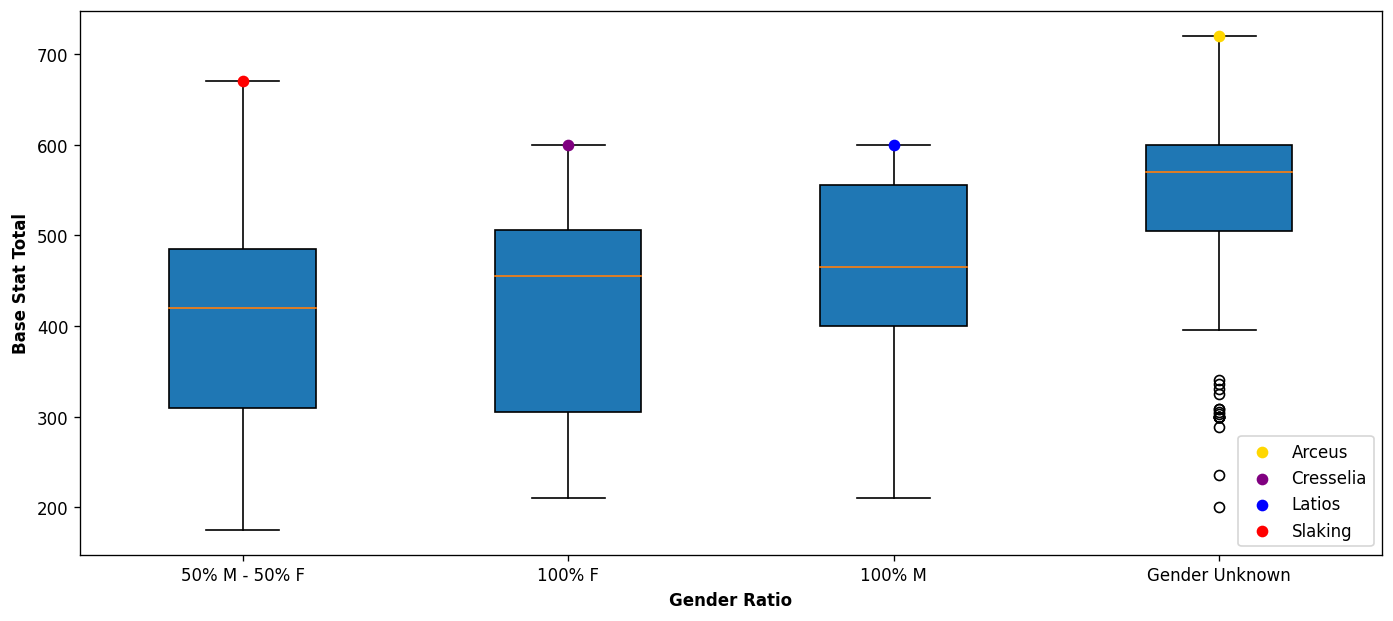

In [200]:
plt.figure(dpi = 120, figsize = (14, 6))
plt.boxplot([details[details["gender_ratio"] == "50% male, 50% female"]["total"],
           details[details["gender_ratio"] == "100% female"]["total"],
           details[details["gender_ratio"] == "100% male"]["total"],
           details[details["gender_ratio"] == "Gender unknown"]["total"]],
           labels = [ "50% M - 50% F",
                    "100% F", "100% M",
                     "Gender Unknown"], patch_artist = True, positions = [1, 2, 3, 4])
plt.scatter(4, int(details[details["name"].str.contains("Arceus")]["total"]),  zorder = 10, c = "gold", label = "Arceus")
plt.scatter(2, int(details[details["name"].str.contains("Cresselia")]["total"]), zorder = 10, c = "purple", label = "Cresselia")
plt.scatter(3, int(details[details["name"].str.contains("Latios")]["total"]), zorder = 10, c = "blue", label = "Latios")
plt.scatter(1, int(details[details["name"].str.contains("Slaking")]["total"]), zorder = 10, c = "red", label = "Slaking")
plt.legend()
plt.xlabel("Gender Ratio", fontweight = "bold")
plt.ylabel("Base Stat Total", fontweight = "bold")
plt.show()


In [195]:
details[(details["gender_ratio"].str.contains("50% male, 50% female")) & (details["total"] == 670)]


,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,...,base_friendship,category,gen,hp,attack,defense,special_attack,special_defense,speed,total
289,#0289,Slaking,Normal,Truant,None,"50% male, 50% female",15cycles,Field,252.0,2.0,...,70.0,Lazy Pokémon,3,150.0,160.0,100.0,95.0,65.0,100.0,670.0


In [139]:
details[details["gender_ratio"] == "Gender unknown"]

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,...,base_friendship,category,gen,hp,attack,defense,special_attack,special_defense,speed,total
81,#0081,Magnemite,Electric / Steel,Magnet Pull / Sturdy,Analytic,Gender unknown,20cycles,Mineral,65.0,0.3,...,70.0,Magnet Pokémon,1,25.0,35.0,70.0,95.0,55.0,45.0,325.0
82,#0082,Magneton,Electric / Steel,Magnet Pull / Sturdy,Analytic,Gender unknown,20cycles,Mineral,163.0,1.0,...,70.0,Magnet Pokémon,1,50.0,60.0,95.0,120.0,70.0,70.0,465.0
100,#0100,Voltorb,Electric,Soundproof / Static,Aftermath,Gender unknown,20cycles,Mineral,66.0,0.5,...,70.0,Ball Pokemon,1,40.0,30.0,50.0,55.0,55.0,100.0,330.0
101,#0101,Electrode,Electric,Soundproof / Static,Aftermath,Gender unknown,20cycles,Mineral,172.0,1.2,...,70.0,Ball Pokemon,1,60.0,50.0,70.0,80.0,80.0,140.0,480.0
120,#0120,Staryu,Water,Illuminate / Natural Cure,Analytic,Gender unknown,20cycles,Water 3,68.0,0.8,...,70.0,Star Shape Pokémon,1,30.0,45.0,55.0,70.0,55.0,85.0,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,#1020,Gouging Fire,Fire / Dragon,Protosynthesis,None,Gender unknown,50cycles,No Eggs Discovered,295.0,3.5,...,0.0,Paradox Pokémon,9,105.0,115.0,121.0,65.0,93.0,91.0,590.0
1021,#1021,Raging Bolt,Electric / Dragon,Protosynthesis,None,Gender unknown,50cycles,No Eggs Discovered,295.0,5.2,...,0.0,Paradox Pokémon,9,125.0,73.0,91.0,137.0,89.0,75.0,590.0
1022,#1022,Iron Boulder,Rock / Psychic,Quark Drive,None,Gender unknown,50cycles,No Eggs Discovered,295.0,1.5,...,0.0,Paradox Pokémon,9,90.0,120.0,80.0,68.0,108.0,124.0,590.0
1023,#1023,Iron Crown,Steel / Psychic,Quark Drive,None,Gender unknown,50cycles,No Eggs Discovered,295.0,1.6,...,0.0,Paradox Pokémon,9,90.0,72.0,100.0,122.0,108.0,98.0,590.0


In [144]:
details["category"].unique()
details["category"].value_counts()

Paradox Pokémon        22
Mouse Pokémon           8
Dragon Pokémon          7
Fox Pokémon             7
Poison Pin Pokémon      6
                       ..
Symbol Pokémon          1
Tera Pokémon            1
Beckon Pokémon          1
New Species Pokémon     1
Sea Urchin Pokémon      1
Name: category, Length: 726, dtype: int64

In [203]:
details["egg_group"].unique()

array(['Monster / Grass', 'Monster / Dragon', 'Monster / Water 1', 'Bug',
       'Flying', 'Field', 'Field / Dragon', 'Field / Fairy',
       'Monsterand Field', 'No Eggs Discovered', 'Monster / Field',
       'Fairy', 'Grass', 'Bug / Grass', 'Water 1 / Field', 'Water 1',
       'Human-Like', 'Water 3', 'Mineral', 'Flying / Field', 'Amorphous',
       'Monster', 'Water 1 / Dragon', 'Water 2', 'Water 2 / Dragon',
       'Ditto', 'Water 1 / Water 3', 'Flying / Fairy', 'Water 1 / Fairy',
       'Fairy / Grass', 'Water 1 / Water 2', 'Water 1 / Grass',
       'Field / Grass', 'Water 1 / Flying', 'Human-Like / Amorphous',
       'Water 1 / Bug', 'Bug / Human-Like', 'Field / Water 2',
       'Field / Human-Like', 'Bug / Dragon', 'Grass / Human-Like',
       'Flying / Dragon', 'Fairy / Amorphous', 'Fairy / Mineral',
       'Dragon', 'Water 1 / Amorphous', 'Bug / Water 3', 'Field / Flying',
       'Grass / Fairy', 'Bug / Mineral', 'Mineral / Amorphous',
       'Flying / Water 3', 'Grass / Miner

In [222]:
monster = details[details["egg_group"].str.contains("Monster") == True]
human_like = details[details["egg_group"].str.contains("Human-Like") == True]
comb = pd.concat([monster, human_like])
comb

,number,name,type,ability,hidden_ability,gender_ratio,hatch_cycle,egg_group,Base_Experience_Yield,height,...,base_friendship,category,gen,hp,attack,defense,special_attack,special_defense,speed,total
1,#0001,Bulbasaur,Grass / Poison,Overgrow,Chlorophyll,"87.5% male, 12.5% female",20cycles,Monster / Grass,64.0,0.7,...,70.0,Seed Pokémon,1,45.0,49.0,49.0,65.0,65.0,45.0,318.0
2,#0002,Ivysaur,Grass / Poison,Overgrow,Chlorophyll,"87.5% male, 12.5% female",20cycles,Monster / Grass,142.0,1.0,...,70.0,Seed Pokémon,1,60.0,62.0,63.0,80.0,80.0,60.0,405.0
3,#0003,Venusaur,Grass / Poison,Overgrow / Chlorophyll,Thick Fat,"87.5% male, 12.5% female",20cycles,Monster / Grass,236.0,2.0,...,70.0,Seed Pokémon,1,80.0,82.0,83.0,100.0,100.0,80.0,525.0
4,#0004,Charmander,Fire,Blaze,Solar Power,"87.5% male, 12.5% female",20cycles,Monster / Dragon,62.0,0.6,...,70.0,Lizard Pokémon,1,39.0,52.0,43.0,60.0,50.0,65.0,309.0
5,#0005,Charmeleon,Fire,Blaze,Solar Power,"87.5% male, 12.5% female",20cycles,Monster / Dragon,142.0,1.1,...,70.0,Flame Pokémon,1,58.0,64.0,58.0,80.0,65.0,80.0,405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,#0866,Mr. Rime,Ice / Psychic,Tangled Feet / Screen Cleaner,Ice Body,"50% male, 50% female",25cycles,Human-Like,182.0,1.5,...,50.0,Comedian Pokémon,8,80.0,85.0,75.0,110.0,100.0,70.0,520.0
935,#0935,Charcadet,Fire,Flash Fire,Flame Body,"50% male, 50% female",35cycles,Human-Like,51.0,0.6,...,50.0,Fire Child Pokémon,9,40.0,50.0,40.0,50.0,40.0,35.0,255.0
936,#0936,Armarouge,Fire / Psychic,Flash Fire,Weak Armor,"50% male, 50% female",35cycles,Human-Like,263.0,1.5,...,20.0,Fire Warrior Pokémon,9,85.0,60.0,100.0,125.0,80.0,75.0,525.0
937,#0937,Ceruledge,Fire / Ghost,Flash Fire,Weak Armor,"50% male, 50% female",35cycles,Human-Like,263.0,1.6,...,20.0,Fire Blades Pokémon,9,75.0,125.0,80.0,60.0,100.0,85.0,525.0


In [241]:
types = ["fire", "dark", "flying", "fighting", "bug", "fairy", "water", "ice", "electric", "dragon",
        "psychic", "rock", "ground", "poison", "ghost", "normal", "grass", "steel"]
monster_type = gen_type(monster)
human_like_type = gen_type(human_like)
monster_type

,generation,fire,dark,flying,fighting,bug,fairy,water,ice,electric,dragon,psychic,rock,ground,poison,ghost,normal,grass,steel
0,1,3.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,2.0,2.0,5.0,7.0,0.0,3.0,3.0,0.0
1,2,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,3.0,0.0
2,3,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0,4.0,3.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,5.0,5.0,0.0,0.0,1.0,5.0,2.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0
6,7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
7,8,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
type_comb = pd.DataFrame(columns = ["type", "monster", "human_like"], index = range(1,19))
for i, type_ in enumerate(types, start = 1):
    m = sum(monster_type[f"{type_}"])
    h = sum(human_like_type[f"{type_}"])
    type_comb.loc[i, "type"] = type_
    type_comb.loc[i, "monster"] = m
    type_comb.loc[i, "human_like"] = h

type_comb

,type,monster,human_like
1,fire,6,11
2,dark,1,9
3,flying,2,1
4,fighting,0,28
5,bug,0,2
6,fairy,0,7
7,water,15,0
8,ice,7,2
9,electric,5,3
10,dragon,11,0


In [323]:
human_like_abilities = ["Inner Focus" "No Guard", "Guts",
       "Insomnia", "Forewarn", "Limber", "Reckless" "Keen Eye",
       "Soundproof", "Oblivious", "Static",
       "Flame Body", "Intimidate", "Technician", "Synchronize", "Trace",
       "Thick Fat", "Keen Eye", "Stall", "Pure Power",
       "Illuminate", "Swarm", "Tinted Lens",
       "Own Tempo" "Tangled Feet", "Sand Veil", "Blaze",
       "Run Away", "Klutz", "Cute Charm",
       "Steadfast", "Anticipation", "Dry Skin",
       "Motor Drive", "Sharpness", "Sheer Force",
       "Sturdy",
       "Frisk", "Competitive", "Telepathy",
       "Regenerator", "Defiant",
       "Iron Fist", "Mold Breaker", "Unburden",
       "Punk Rock", "Plus", "Prankster",
       "Screen Cleaner", "Flash Fire",
       "Supreme Overlord", "Magic Guard",
       "Vital Spirit", "Contrary", "Water Absorb", 
       "Shadow Tag", "Analytic", "Pressure", "Scrappy", "Libero",
       "Pickpocket", "Ice Body", 
       "Weak Armor"]

monster_abilities = ["Overgrow", "Chlorophyll", "Blaze", "Torrent",
       "Rain Dish", "Poison Point" "Rivalry",
       "Oblivious", "Own Tempo", "Rock Head", "Lightning Rod",
       "Early Bird", "Scrappy", "Water Absorb", "Shell Armor",
       "Immunity", "Thick Fat", "Static", "Guts", "Shed Skin",
       "Sand Stream",
       "Solar Power", "Mold Breaker",
       "Snow Warning", "Solid Rock",
       "Rivalry", "Rough Skin", "Sheer Force",
       "Dry Skin", "Sand Veil", "Strong Jaw", "Refrigerate",
       "Ice Body", "Corrosion",
       "Berserk" "Sap Sipper", "Mega Launcher", 
       "Hustle", "Regenerator", "Battle Armor"
       "Cloud Nine", "Hydration", "Gluttony",
       "Leaf Guard", "Plus", "Unnerve", "Unburden",
       "Damp", "Rattled", "Heavy Metal", 
       "Harvest", "Soundproof",
       "Swift Swim"]
tog_abilities = list(set(monster_abilities).union(set(human_like_abilities)))
len(tog_abilities)

94

In [327]:
abilities_count_mh = pd.DataFrame(columns = {"ability", "monster_count", "human_like_count"}, index = range(0, 94))
for i, ability in enumerate(tog_abilities):
    abilities_count_mh.loc[i, "ability"] = ability
    abilities_count_mh.loc[i, "monster_count"] = monster[(monster["ability"] == f"{ability}") | (monster["hidden_ability"] == f"{ability}")]["name"].count()
    abilities_count_mh.loc[i, "human_like_count"] = human_like[(human_like["ability"] == f"{ability}") | (human_like["hidden_ability"] == f"{ability}")]["name"].count()

In [329]:
comb[comb["egg_group"].str.contains("Monster")]["Base_Experience_Yield"].mean()
comb[comb["egg_group"].str.contains("Human-Like")]["Base_Experience_Yield"].mean()

147.0857142857143

In [18]:
details.groupby("gen")["total"].min()

gen
1    195.0
2    180.0
3    190.0
4    194.0
5    255.0
6    200.0
7    175.0
8    180.0
9    210.0
Name: total, dtype: float64

In [272]:
# getting pokemon whose attack or special attack stat is the highest 
m = []
for name in list(details["name"]):
    if (int(details[details["name"] == name]["attack"]) + int(details[details["name"] == name]["special_attack"])) == (int(details[details["name"] == name]["defense"]) + int(details[details["name"] == name]["defense"])):
           m.append(name)
len(m)

46

In [261]:
sum(int(details[details["name"] == "Greninja"]["attack"]), int(details[details["name"] == "Greninja"]["special_attack"])) 

TypeError: 'int' object is not iterable

In [264]:
int(details[details["name"] == "Greninja"]["attack"])

95

In [20]:
type_gen

,generation,fire,dark,flying,fighting,bug,fairy,water,ice,electric,dragon,psychic,rock,ground,poison,ghost,normal,grass,steel
0,1,12,0,19,8,12,5,32,5,9,3,14,11,14,33,3,22,14,2
1,2,10,6,19,3,10,8,18,5,8,1,10,7,10,4,1,15,10,4
2,3,6,10,12,7,14,5,28,6,4,9,20,12,13,5,6,18,17,9
3,4,5,7,14,7,9,2,14,6,7,6,9,7,10,8,8,17,14,10
4,5,15,16,18,15,18,2,17,7,11,10,15,10,11,7,9,17,20,12
5,6,8,5,8,4,3,13,9,4,3,9,6,8,2,2,8,8,9,4
6,7,8,2,8,10,11,12,13,1,6,7,8,5,4,7,8,12,13,8
7,8,7,10,5,8,8,8,11,7,9,11,9,6,4,5,9,8,10,5
8,9,10,13,6,11,7,9,12,7,12,14,11,8,7,12,13,14,20,11


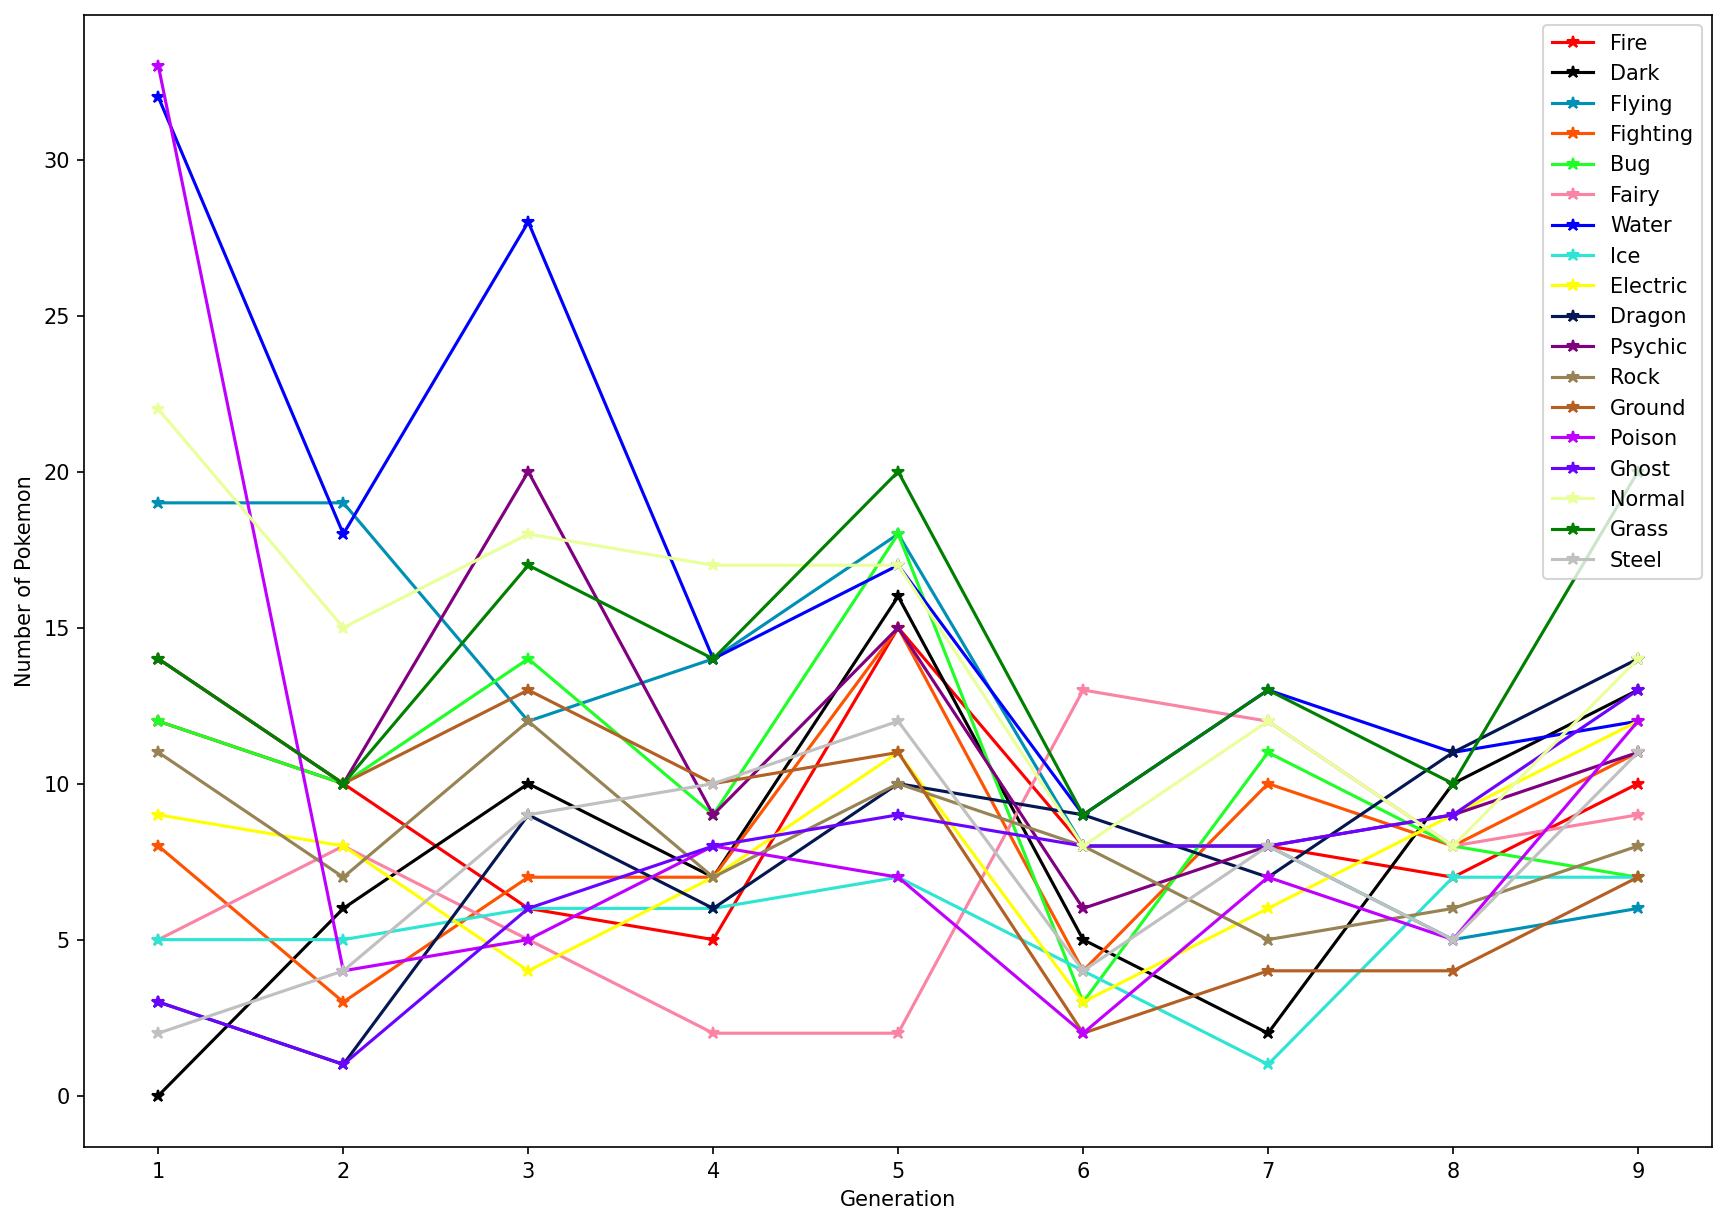

In [21]:
# ploting 
plt.figure(dpi = 150, figsize = (14, 10))
plt.plot(type_gen.generation, type_gen.fire, label = "Fire", c = "r", marker = "*")
plt.plot(type_gen.generation, type_gen.dark, label = "Dark", c = "black", marker = "*")
plt.plot(type_gen.generation, type_gen.flying, label = "Flying", c = "#0090b5", marker = "*")
plt.plot(type_gen.generation, type_gen.fighting, label = "Fighting", c = "#fe5300", marker = "*")
plt.plot(type_gen.generation, type_gen.bug, label = "Bug", c = "#1ffe26", marker = "*")
plt.plot(type_gen.generation, type_gen.fairy, label = "Fairy", c = "#fb83a4", marker = "*")
plt.plot(type_gen.generation, type_gen.water, label = "Water", c = "blue", marker = "*")
plt.plot(type_gen.generation, type_gen.ice, label = "Ice", c = "#2ee5d3", marker = "*")
plt.plot(type_gen.generation, type_gen.electric, label = "Electric", c = "yellow", marker = "*")
plt.plot(type_gen.generation, type_gen.dragon, label = "Dragon", c = "#051753", marker = "*")
plt.plot(type_gen.generation, type_gen.psychic, label = "Psychic", c = "purple", marker = "*")
plt.plot(type_gen.generation, type_gen.rock, label = "Rock", c = "#978353", marker = "*")
plt.plot(type_gen.generation, type_gen.ground, label = "Ground", c = "#b45f23", marker = "*")
plt.plot(type_gen.generation, type_gen.poison, label = "Poison", c = "#c000ff", marker = "*")
plt.plot(type_gen.generation, type_gen.ghost, label = "Ghost", c = "#6b04ff", marker = "*")
plt.plot(type_gen.generation, type_gen.normal, label = "Normal", c = "#e8ff9a", marker = "*")
plt.plot(type_gen.generation, type_gen.grass, label = "Grass", c = "green", marker = "*")
plt.plot(type_gen.generation, type_gen.steel, label = "Steel", c = "silver", marker = "*")
plt.legend(loc = "best")
plt.xlabel("Generation")
plt.ylabel("Number of Pokemon")
plt.show()

In [337]:
details.corr()

,Base_Experience_Yield,height,weight,base_friendship,gen,hp,attack,defense,special_attack,special_defense,speed,total
Base_Experience_Yield,1.000000,0.476226,0.433907,-0.335197,0.170967,0.683652,0.620316,0.549325,0.643602,0.654099,0.513936,0.922539
height,0.476226,1.000000,0.632504,-0.313313,0.052696,0.483217,0.384335,0.348725,0.319507,0.276189,0.201393,0.506783
weight,0.433907,0.632504,1.000000,-0.383344,0.111277,0.476355,0.402339,0.447561,0.185233,0.265010,0.043313,0.457546
base_friendship,-0.335197,-0.313313,-0.383344,1.000000,-0.407735,-0.174503,-0.307630,-0.228202,-0.243125,-0.163128,-0.230114,-0.342685
gen,0.170967,0.052696,0.111277,-0.407735,1.000000,0.121887,0.146967,0.099932,0.086569,0.065650,0.079556,0.152059
hp,0.683652,0.483217,0.476355,-0.174503,0.121887,1.000000,0.480018,0.299119,0.356717,0.365108,0.179567,0.666531
attack,0.620316,0.384335,0.402339,-0.307630,0.146967,0.480018,1.000000,0.466646,0.286626,0.226016,0.353644,0.717170
defense,0.549325,0.348725,0.447561,-0.228202,0.099932,0.299119,0.466646,1.000000,0.208710,0.501515,0.007538,0.629432
special_attack,0.643602,0.319507,0.185233,-0.243125,0.086569,0.356717,0.286626,0.208710,1.000000,0.492095,0.423616,0.701008
special_defense,0.654099,0.276189,0.265010,-0.163128,0.065650,0.365108,0.226016,0.501515,0.492095,1.000000,0.213162,0.696413


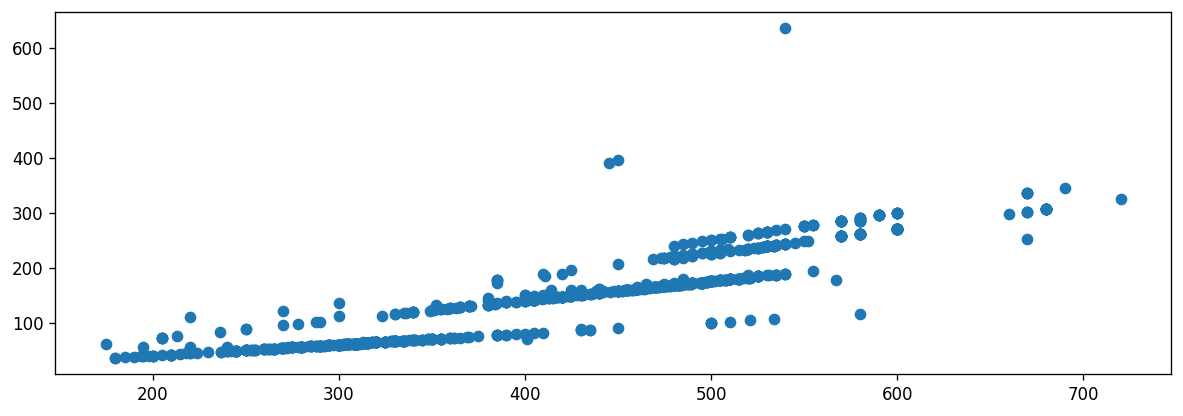

<Figure size 720x480 with 0 Axes>

In [336]:

plt.figure(dpi = 120, figsize = (12, 4))
plt.scatter(details.total, details.Base_Experience_Yield)
plt.figure(dpi = 120)
plt.show()